In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from sklearn import preprocessing
from tensorflow_addons.layers import GroupNormalization
from keras.layers import Input, Dense, Flatten, Dropout, Add
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from keras.layers.pooling import MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
tf.compat.v1.disable_v2_behavior()
tf.get_logger().setLevel('ERROR')
%matplotlib inline

#Import Necessary packages
#Helpful link for reference, using the CHILDESCorpusReader functions: 
# https://www.nltk.org/howto/childes.html

import nltk
from nltk.corpus.reader import CHILDESCorpusReader

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
data = pd.read_csv('/Users/sanikakatekar/Desktop/Spring 2022/Machine Learning/Project/mlcsv')

In [7]:
# giving names to the columns
data.columns = ['age', 'wordsPerSentence', 'realWordRatio', 'avgWordLength','nounRatio', 'verbRatio', 'adjectiveRatio']

In [8]:
data

,age,wordsPerSentence,realWordRatio,avgWordLength,nounRatio,verbRatio,adjectiveRatio
0,0,2.55,0.96078,3.78431,0.27451,0.05882,0.11765
1,0,2.50,0.92000,3.96000,0.24000,0.08000,0.06000
2,0,2.85,0.94737,4.35088,0.28070,0.07018,0.10526
3,0,2.40,0.95833,3.81250,0.27083,0.02083,0.04167
4,0,3.85,0.98701,3.74026,0.33766,0.01299,0.09091
...,...,...,...,...,...,...,...
32347,97,3.50,0.97143,3.91429,0.47143,0.01429,0.04286
32348,97,2.40,0.93750,3.68750,0.37500,0.02083,0.04167
32349,97,2.70,0.96296,3.87037,0.42593,0.00000,0.03704
32350,97,2.95,0.96610,3.93220,0.45763,0.01695,0.05085


In [9]:
data = data.drop(data.index[data['age'] < 12]).reset_index(drop=True)
data = data.drop(data.index[data['age'] > 60]).reset_index(drop=True)
data

,age,wordsPerSentence,realWordRatio,avgWordLength,nounRatio,verbRatio,adjectiveRatio
0,12,1.05,1.00000,3.23810,0.52381,0.14286,0.00000
1,12,1.00,0.90000,3.45000,0.65000,0.15000,0.00000
2,12,1.05,0.95238,3.80952,0.23810,0.04762,0.04762
3,12,1.00,0.80000,3.90000,0.15000,0.00000,0.00000
4,12,1.00,1.00000,3.05000,0.25000,0.00000,0.00000
...,...,...,...,...,...,...,...
29058,60,3.05,0.88525,3.81967,0.36066,0.01639,0.04918
29059,60,3.90,0.93590,3.42308,0.51282,0.03846,0.01282
29060,60,3.60,0.86111,3.63889,0.38889,0.00000,0.05556
29061,60,1.55,1.00000,3.09677,0.48387,0.09677,0.03226


In [10]:
# mapping = {0:"0-9 yrs", 1:"10-19 yrs", 2:"20-29 yrs", 3:"30-39 yrs", 4:"40-49 yrs", 
#            5:"50-59 yrs", 6:"60-69 yrs"}#, 7:"70-79 yrs"}#, 8:"80-89 yrs", 9:"90-99 yrs"}

In [11]:
# mapping = {0:"8-14 yrs", 1:"14-22 yrs", 2:"22-32 yrs", 3:"32-44 yrs", 4:"44-66 yrs", 5:"66-99"} 
# #            #5:"50-59 yrs", 6:"60-69 yrs"}#, 7:"70-79 yrs"}#, 8:"80-89 yrs", 9:"90-99 yrs"}

In [12]:
mapping = {0:"12-20 yrs", 1:"20-28 yrs", 2:"28-38 yrs", 3:"38-48 yrs", 4:"48-60 yrs"} 
# #            #5:"50-59 yrs", 6:"60-69 yrs"}#, 7:"70-79 yrs"}#, 8:"80-89 yrs", 9:"90-99 yrs"}

In [13]:
for k, v in mapping.items():
    r1, r2 = v.split(" ")[0].split("-")
    data['age'] = np.where(data['age'].between(int(r1),int(r2)+1), k, data['age'])
data

,age,wordsPerSentence,realWordRatio,avgWordLength,nounRatio,verbRatio,adjectiveRatio
0,0,1.05,1.00000,3.23810,0.52381,0.14286,0.00000
1,0,1.00,0.90000,3.45000,0.65000,0.15000,0.00000
2,0,1.05,0.95238,3.80952,0.23810,0.04762,0.04762
3,0,1.00,0.80000,3.90000,0.15000,0.00000,0.00000
4,0,1.00,1.00000,3.05000,0.25000,0.00000,0.00000
...,...,...,...,...,...,...,...
29058,4,3.05,0.88525,3.81967,0.36066,0.01639,0.04918
29059,4,3.90,0.93590,3.42308,0.51282,0.03846,0.01282
29060,4,3.60,0.86111,3.63889,0.38889,0.00000,0.05556
29061,4,1.55,1.00000,3.09677,0.48387,0.09677,0.03226


age
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

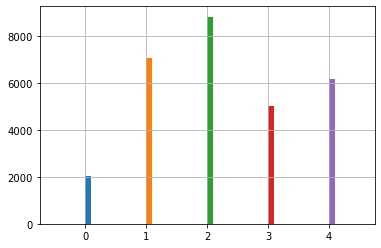

In [14]:

import numpy as np
import matplotlib.pyplot as plt
 
data.groupby('age').age.hist()

In [15]:
X = data.iloc[:,1:]
Y = data.iloc[:,:1]

In [16]:
from sklearn import preprocessing
# standardization of dependent variables
X = pd.DataFrame(preprocessing.scale(X))
X

,0,1,2,3,4,5
0,-1.709201,0.967918,-1.021952,0.996101,2.581525,-1.242898
1,-1.746525,-0.265468,-0.477404,2.049777,2.763886,-1.242898
2,-1.709201,0.380580,0.446504,-1.389556,0.149025,-0.037052
3,-1.746525,-1.498854,0.679022,-2.125184,-1.067225,-1.242898
4,-1.746525,0.967918,-1.505338,-1.290191,-1.067225,-1.242898
...,...,...,...,...,...,...
29058,-0.216251,-0.447393,0.472587,-0.366189,-0.648612,0.002450
29059,0.418252,0.177318,-0.546584,0.904335,-0.084928,-0.918267
29060,0.194310,-0.745132,0.008013,-0.130471,-1.067225,0.164006
29061,-1.335964,0.967918,-1.385147,0.662605,1.404353,-0.426002


In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1 , random_state=4)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(26156, 6)
(2907, 6)
(26156, 1)
(2907, 1)


### ANN model

In [21]:
# One hot encoding of labels/target column
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

In [32]:
def create_model():
    model_input = Input(shape = (6,))
    x = Dense(64,kernel_regularizer=l2(0.0001), activation = 'relu')(model_input)
    x = Dropout(0.2)(x)
    x = Dense(64,kernel_regularizer=l2(0.0001), activation = 'relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(32,kernel_regularizer=l2(0.0001), activation = 'relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(32,kernel_regularizer=l2(0.0001), activation = 'relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(32,kernel_regularizer=l2(0.0001), activation = 'relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(16,kernel_regularizer=l2(0.0001), activation = 'relu')(x)
#     x = Dropout(0.2)(x)
#     x = Dense(32,kernel_regularizer=l2(0.0001), activation = 'relu')(x)
#     x = Dropout(0.2)(x)
#     x = Dense(32,kernel_regularizer=l2(0.0001), activation = 'relu')(x)
#     x = Dropout(0.2)(x)
    x = Dense(8,kernel_regularizer=l2(0.0001), activation = 'relu')(x)
    model_output = Dense(5, activation = 'softmax')(x)
    model = Model(inputs = model_input, outputs = model_output)
    return model

In [33]:
model = create_model()
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_22 (Dense)            (None, 64)                448       
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dropout_15 (Dropout)        (None, 32)                0   

In [34]:
## Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
## Train model
history = model.fit(x_train, y_train, epochs=500, 
                    validation_data=(x_test, y_test), batch_size=1024)

Train on 26156 samples, validate on 2907 samples
Epoch 1/500


2022-04-27 18:36:46.430309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-27 18:36:46.474098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-27 18:36:46.539126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-27 18:36:46.548293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26156/26156 [==============================] - 1s 30us/sample - loss: 1.5963 - acc: 0.2988 - val_loss: 1.5365 - val_acc: 0.3516
Epoch 2/500
 1024/26156 [>.............................] - ETA: 0s - loss: 1.5506 - acc: 0.3457

2022-04-27 18:36:47.183376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26156/26156 [==============================] - 0s 13us/sample - loss: 1.5176 - acc: 0.3441 - val_loss: 1.4756 - val_acc: 0.3481
Epoch 3/500
26156/26156 [==============================] - 0s 13us/sample - loss: 1.4748 - acc: 0.3483 - val_loss: 1.4398 - val_acc: 0.3495
Epoch 4/500
26156/26156 [==============================] - 0s 13us/sample - loss: 1.4384 - acc: 0.3526 - val_loss: 1.4067 - val_acc: 0.3467
Epoch 5/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.4024 - acc: 0.3537 - val_loss: 1.3655 - val_acc: 0.3492
Epoch 6/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.3768 - acc: 0.3650 - val_loss: 1.3414 - val_acc: 0.3873
Epoch 7/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.3598 - acc: 0.3752 - val_loss: 1.3351 - val_acc: 0.3846
Epoch 8/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.3525 - acc: 0.3792 - val_loss: 1.3276 - val_acc: 0.3915
Epoch 9/500
26156/26156 [=======

26156/26156 [==============================] - 0s 12us/sample - loss: 1.2788 - acc: 0.4243 - val_loss: 1.2949 - val_acc: 0.4090
Epoch 119/500
26156/26156 [==============================] - 0s 11us/sample - loss: 1.2785 - acc: 0.4257 - val_loss: 1.2911 - val_acc: 0.4028
Epoch 120/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2767 - acc: 0.4238 - val_loss: 1.2920 - val_acc: 0.4028
Epoch 121/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2763 - acc: 0.4255 - val_loss: 1.2929 - val_acc: 0.4045
Epoch 122/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2762 - acc: 0.4246 - val_loss: 1.2926 - val_acc: 0.3994
Epoch 123/500
26156/26156 [==============================] - 0s 11us/sample - loss: 1.2750 - acc: 0.4242 - val_loss: 1.2946 - val_acc: 0.4008
Epoch 124/500
26156/26156 [==============================] - 0s 11us/sample - loss: 1.2755 - acc: 0.4250 - val_loss: 1.2957 - val_acc: 0.4025
Epoch 125/500
26156/

Epoch 176/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2688 - acc: 0.4316 - val_loss: 1.2907 - val_acc: 0.4039
Epoch 177/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2674 - acc: 0.4314 - val_loss: 1.2914 - val_acc: 0.3994
Epoch 178/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2703 - acc: 0.4285 - val_loss: 1.2897 - val_acc: 0.4032
Epoch 179/500
26156/26156 [==============================] - 0s 11us/sample - loss: 1.2702 - acc: 0.4272 - val_loss: 1.2935 - val_acc: 0.4045
Epoch 180/500
26156/26156 [==============================] - 0s 11us/sample - loss: 1.2694 - acc: 0.4288 - val_loss: 1.2863 - val_acc: 0.4066
Epoch 181/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2672 - acc: 0.4290 - val_loss: 1.2862 - val_acc: 0.4083
Epoch 182/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2671 - acc: 0.4284 - val_loss: 1.2936 - val_acc: 0.4018
Epoch 

Epoch 234/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2623 - acc: 0.4332 - val_loss: 1.2869 - val_acc: 0.4056
Epoch 235/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2640 - acc: 0.4346 - val_loss: 1.2917 - val_acc: 0.3908
Epoch 236/500
26156/26156 [==============================] - 0s 11us/sample - loss: 1.2631 - acc: 0.4330 - val_loss: 1.2872 - val_acc: 0.4014
Epoch 237/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2633 - acc: 0.4325 - val_loss: 1.2872 - val_acc: 0.4018
Epoch 238/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2632 - acc: 0.4358 - val_loss: 1.2871 - val_acc: 0.4042
Epoch 239/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2656 - acc: 0.4306 - val_loss: 1.2863 - val_acc: 0.4063
Epoch 240/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2609 - acc: 0.4339 - val_loss: 1.2897 - val_acc: 0.4039
Epoch 

Epoch 292/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2598 - acc: 0.4368 - val_loss: 1.2900 - val_acc: 0.4059
Epoch 293/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2591 - acc: 0.4384 - val_loss: 1.2932 - val_acc: 0.4035
Epoch 294/500
26156/26156 [==============================] - 0s 11us/sample - loss: 1.2579 - acc: 0.4344 - val_loss: 1.2975 - val_acc: 0.4032
Epoch 295/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2611 - acc: 0.4332 - val_loss: 1.2880 - val_acc: 0.4025
Epoch 296/500
26156/26156 [==============================] - 0s 11us/sample - loss: 1.2614 - acc: 0.4324 - val_loss: 1.2920 - val_acc: 0.3990
Epoch 297/500
26156/26156 [==============================] - 0s 11us/sample - loss: 1.2634 - acc: 0.4354 - val_loss: 1.2899 - val_acc: 0.4028
Epoch 298/500
26156/26156 [==============================] - 0s 11us/sample - loss: 1.2592 - acc: 0.4342 - val_loss: 1.2886 - val_acc: 0.4080
Epoch 

Epoch 350/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2594 - acc: 0.4376 - val_loss: 1.2859 - val_acc: 0.4080
Epoch 351/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2558 - acc: 0.4413 - val_loss: 1.2922 - val_acc: 0.4042
Epoch 352/500
26156/26156 [==============================] - 0s 11us/sample - loss: 1.2585 - acc: 0.4428 - val_loss: 1.2864 - val_acc: 0.4111
Epoch 353/500
26156/26156 [==============================] - 0s 11us/sample - loss: 1.2589 - acc: 0.4351 - val_loss: 1.2815 - val_acc: 0.4087
Epoch 354/500
26156/26156 [==============================] - 0s 11us/sample - loss: 1.2582 - acc: 0.4356 - val_loss: 1.2904 - val_acc: 0.4073
Epoch 355/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2576 - acc: 0.4391 - val_loss: 1.2841 - val_acc: 0.4097
Epoch 356/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2586 - acc: 0.4396 - val_loss: 1.2859 - val_acc: 0.4118
Epoch 

Epoch 408/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2574 - acc: 0.4395 - val_loss: 1.2884 - val_acc: 0.4100
Epoch 409/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2573 - acc: 0.4369 - val_loss: 1.2883 - val_acc: 0.4035
Epoch 410/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2545 - acc: 0.4400 - val_loss: 1.2863 - val_acc: 0.4066
Epoch 411/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2541 - acc: 0.4385 - val_loss: 1.2879 - val_acc: 0.4045
Epoch 412/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2554 - acc: 0.4407 - val_loss: 1.2891 - val_acc: 0.4049
Epoch 413/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2553 - acc: 0.4392 - val_loss: 1.2919 - val_acc: 0.3997
Epoch 414/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2572 - acc: 0.4402 - val_loss: 1.2820 - val_acc: 0.4128
Epoch 

Epoch 466/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2551 - acc: 0.4397 - val_loss: 1.2901 - val_acc: 0.4056
Epoch 467/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2551 - acc: 0.4396 - val_loss: 1.2909 - val_acc: 0.4032
Epoch 468/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2535 - acc: 0.4409 - val_loss: 1.2878 - val_acc: 0.4094
Epoch 469/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2554 - acc: 0.4396 - val_loss: 1.2923 - val_acc: 0.4052
Epoch 470/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2555 - acc: 0.4393 - val_loss: 1.2896 - val_acc: 0.4066
Epoch 471/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2539 - acc: 0.4403 - val_loss: 1.2862 - val_acc: 0.4035
Epoch 472/500
26156/26156 [==============================] - 0s 12us/sample - loss: 1.2548 - acc: 0.4391 - val_loss: 1.2853 - val_acc: 0.4090
Epoch 

train_acc: 0.4481      train_loss: 1.242
val_acc: 0.4166        val_loss: 1.2924


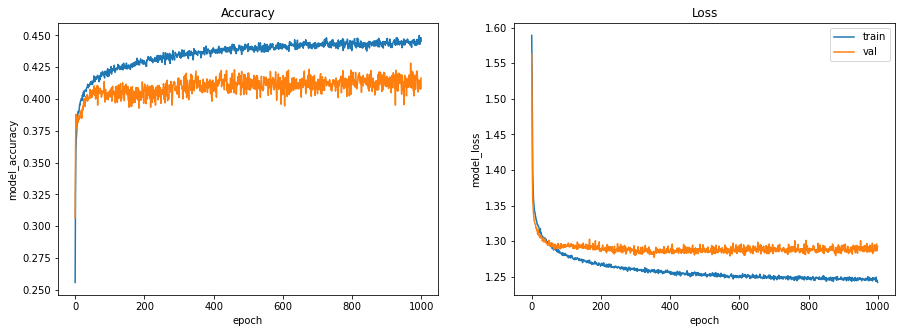

In [31]:
### Plotting accuracy/loss graph

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss'] #get_loss(history.history['loss'])
val_loss = history.history['val_loss'] #get_loss(history.history['val_loss'])
print('train_acc:', round(acc[-1], 4), "    ", 'train_loss:', round(loss[-1], 4))
print('val_acc:', round(val_acc[-1], 4), "      ", 'val_loss:', round(val_loss[-1], 4))
fig = plt.figure(figsize=(15, 5))
## Accuracy plot
plt.subplot(1, 2, 1) 
plt.plot(acc)
plt.plot(val_acc)
plt.title('Accuracy')
plt.ylabel('model_accuracy')
plt.xlabel('epoch')
## Loss plot
plt.subplot(1, 2, 2) 
plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss')
plt.ylabel('model_loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

 # Decision Tree Model

In [38]:
!pip install pydotplus

     |████████████████████████████████| 278 kB 2.6 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24576 sha256=d97f2f025c192db00dfd9a5fd9be34dfca1c1034ce03594682685f74919b8254
  Stored in directory: /Users/sanikakatekar/Library/Caches/pip/wheels/89/e5/de/6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
#Create decision tree classifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train).score(x_train,y_train)

0.9996176785441199

In [42]:
features = ['wordsPerSentence', 'realWordRatio', 'avgWordLength','nounRatio', 'verbRatio', 'adjectiveRatio']

In [ ]:
#Visualization
#The below code has been directly taken from this article for te purpose of visualization: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('PlayTennis.png')
Image(graph.create_png())

# Neural Network Model

In [ ]:
#removing age with 0 values
data.drop(data.index[data['age'] == 0], inplace = True)
data

In [ ]:
for i in data['age']:
    if i in range(1,10):
        print("True")
        data['age'] = data['age'].replace([i],1)
    else: data['age'] = data['age'].replace([i],2)

    

In [ ]:
def age_split(data):
    for i in data['age']:
        if i in range(1,10):
            data['age'] = data['age'].replace([i],1)
        elif i in range(10,20):
            data['age'] = data['age'].replace([i],2)            
        elif i in range(20,30):
            data['age'] = data['age'].replace([i],3)            
        elif i in range(30,40):
            data['age'] = data['age'].replace([i],4)        
        elif i in range(40,50):
            data['age'] = data['age'].replace([i],5)        
        elif i in range(50,60):
            data['age'] = data['age'].replace([i],6)
        elif i in range(60,70):
            data['age'] = data['age'].replace([i],7)
        elif i in range(70,80):
            data['age'] = data['age'].replace([i],8)            
        elif i in range(80,90):
            data['age'] = data['age'].replace([i],9)            
        else: 
            data['age'] = data['age'].replace([i],10)  
            
            
    return data

In [ ]:
data1 = age_split(data)

In [ ]:
data1

In [ ]:
X = data1.iloc[:,1:7].astype(float)
Y = data1.iloc[:,0]

In [ ]:
#standardization of data
X = preprocessing.scale(X)
print(X)

In [ ]:
Y.unique() #to find the number of classes

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33 , random_state=4)

In [ ]:
def neural_model():
    model = Sequential()
    model.add(Dense(16, input_dim=6, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(64, activation='relu'))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(64, activation='relu'))

    model.add(Dense(87, activation='softmax'))
    return model

In [ ]:
model = neural_model()
model.summary()

In [ ]:
## Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
## Train model
history = model.fit(x_train, y_train, epochs=1200, validation_data=(x_test, y_test),
                    batch_size=300)

In [ ]:
embedding_dim= 16


In [ ]:
#Model
inp= Input(shape=()) #input shape
emb= Embedding(max_features + 1, embedding_dim),
y = GlobalAveragePooling2D()(emb)
x1 = Dense(16, activation = 'relu')(inp)
x2 = Dense(32, activation = 'relu')(x1)
x3 = Dropout(0.1)(x2)
x4 = Dense(64, activation = 'relu')(x3)
model_output = Dense(87, activation = 'softmax')(x4) #input number of classes
model = Model(inputs = inp, outputs = model_output)
model.summary()

In [ ]:
model.compile(loss=losses.CategoricalCrossentropy(from_logits=True),
              optimizer='adam')
              #metrics=tf.metrics.BinaryAccuracy(threshold=0.0))
